# Project: CoDoctor

- Name: Dhanu Sree Suresh
- Aim: To predict disease based on symptoms inputed by the user

In [1]:
#If libraries not installed, run this cell
!pip install numpy
!pip install scipy
!pip install keras
!pip install gradio
!pip install pandas
!pip install seaborn
!pip install tabulate
!pip install matplotlib
!pip install tensorflow
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 10.0 

In [1]:
#Importing required libraries
import time
import json
import keras
import numpy as np
import gradio as gr
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.svm import SVC
from scipy.stats import mode
from tabulate import tabulate
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error, precision_score, recall_score, f1_score, mean_absolute_error

In [2]:
#Reading the dataset
DF = pd.read_csv("Diseases.csv")

In [3]:
%%time
DF.to_csv("Diseases.csv.zip", compression = 'gzip', index = False)

CPU times: user 337 ms, sys: 0 ns, total: 337 ms
Wall time: 547 ms


In [4]:
#Compressing and using dataset to prevent corruption of program
df = pd.read_csv("Diseases.csv.zip", compression = 'gzip')

In [5]:
#Displays information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Columns: 132 entries, itching to prognosis
dtypes: int64(131), object(1)
memory usage: 5.0+ MB


In [6]:
#Displays basic statistical details about the DataFrame
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,...,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000
mean,0.138049,0.160016,0.021967,0.045143,0.021967,0.162233,0.139057,0.045143,0.045143,0.021967,...,0.021967,0.021967,0.021967,0.023378,0.023176,0.023176,0.023176,0.023176,0.023378,0.023176
std,0.344986,0.366658,0.146590,0.207639,0.146590,0.368702,0.346041,0.207639,0.207639,0.146590,...,0.146590,0.146590,0.146590,0.151115,0.150478,0.150478,0.150478,0.150478,0.151115,0.150478
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#Displays first 5 rows from the dataset
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [8]:
#Displays all the columns available in the dataset
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=132)

In [9]:
#Displays the amount of null values in the columns
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 132, dtype: int64

In [10]:
#To display the diseases and their frequency in the dataset
df.prognosis.value_counts()

Fungal infection                           122
Hepatitis C                                121
Hepatitis E                                121
Alcoholic hepatitis                        121
Tuberculosis                               121
Common Cold                                121
Pneumonia                                  121
Dimorphic haemorrhoids(piles)              121
Heart attack                               121
Varicose veins                             121
Hypothyroidism                             121
Hyperthyroidism                            121
Hypoglycaemia                              121
Osteoarthristis                            121
Arthritis                                  121
(Vertigo) Paroxysmal Positional Vertigo    121
Acne                                       121
Urinary tract infection                    121
Psoriasis                                  121
Hepatitis D                                121
Hepatitis B                                121
Allergy      

# Label Encoding

- Assignment of a number for each category (categorical values to numeric values)
- Reason: Machine learning models can only work with numerical values

In [11]:
encoder = LabelEncoder()
df["prognosis"] = encoder.fit_transform(df["prognosis"])
x = df[['itching','skin_rash','nodal_skin_eruptions','continuous_sneezing','shivering','chills','joint_pain','stomach_pain','acidity','ulcers_on_tongue','muscle_wasting','vomiting','burning_micturition','spotting_ urination','fatigue','weight_gain','anxiety','cold_hands_and_feets','mood_swings','weight_loss','restlessness','lethargy','patches_in_throat','irregular_sugar_level','cough','high_fever','sunken_eyes','breathlessness','sweating','dehydration','indigestion','headache','yellowish_skin','dark_urine','nausea','loss_of_appetite','pain_behind_the_eyes','back_pain','constipation','abdominal_pain','diarrhoea','mild_fever','yellow_urine','yellowing_of_eyes','acute_liver_failure','swelling_of_stomach','swelled_lymph_nodes','malaise','blurred_and_distorted_vision','phlegm','throat_irritation','redness_of_eyes','sinus_pressure','runny_nose','congestion','chest_pain','weakness_in_limbs','fast_heart_rate','pain_during_bowel_movements','pain_in_anal_region','bloody_stool','irritation_in_anus','neck_pain','dizziness','cramps','bruising','obesity','swollen_legs','swollen_blood_vessels','puffy_face_and_eyes','enlarged_thyroid','brittle_nails','swollen_extremeties','excessive_hunger','extra_marital_contacts','drying_and_tingling_lips','slurred_speech','knee_pain','hip_joint_pain','muscle_weakness','stiff_neck','swelling_joints','movement_stiffness','spinning_movements','loss_of_balance','unsteadiness','weakness_of_one_body_side','loss_of_smell','bladder_discomfort','foul_smell_of urine','continuous_feel_of_urine','passage_of_gases','internal_itching','toxic_look_(typhos)','depression','irritability','muscle_pain','altered_sensorium','red_spots_over_body','belly_pain','abnormal_menstruation','dischromic _patches','watering_from_eyes','increased_appetite','polyuria','family_history','mucoid_sputum','rusty_sputum','lack_of_concentration','visual_disturbances','receiving_blood_transfusion','receiving_unsterile_injections','coma','stomach_bleeding','distention_of_abdomen','history_of_alcohol_consumption','fluid_overload_1','blood_in_sputum','prominent_veins_on_calf','palpitations','painful_walking','pus_filled_pimples','blackheads','scurring','skin_peeling','silver_like_dusting','small_dents_in_nails','inflammatory_nails','blister','red_sore_around_nose','yellow_crust_ooze']]
y = df['prognosis']

In [12]:
#Printing the data points of each category to check if it has been changed to numbers
print(df['prognosis'].value_counts())

15    122
20    121
22    121
3     121
36    121
10    121
34    121
13    121
18    121
39    121
26    121
24    121
25    121
31    121
5     121
0     121
2     121
38    121
35    121
21    121
19    121
4     121
40    121
16    121
9     121
14    121
33    121
1     121
12    121
17    121
6     121
23    121
30    121
7     121
32    121
28    121
29    121
8     121
11    121
37    121
27    121
Name: prognosis, dtype: int64


In [13]:
# Printing the first 5 rows of x and y to make sure the data is correct
print(x.head())
print(y.head())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   
2       0           0             1        1                 1  ...   
3       0           0             0        0                 0  ...   
4       0           0             1        0                 0  ...   

   pus_filled_pimples  blackheads  scurring  skin_peeling  \
0                   0           0    

In [14]:
x_values = df[['itching','skin_rash','nodal_skin_eruptions','continuous_sneezing','shivering','chills','joint_pain','stomach_pain','acidity','ulcers_on_tongue','muscle_wasting','vomiting','burning_micturition','spotting_ urination','fatigue','weight_gain','anxiety','cold_hands_and_feets','mood_swings','weight_loss','restlessness','lethargy','patches_in_throat','irregular_sugar_level','cough','high_fever','sunken_eyes','breathlessness','sweating','dehydration','indigestion','headache','yellowish_skin','dark_urine','nausea','loss_of_appetite','pain_behind_the_eyes','back_pain','constipation','abdominal_pain','diarrhoea','mild_fever','yellow_urine','yellowing_of_eyes','acute_liver_failure','swelling_of_stomach','swelled_lymph_nodes','malaise','blurred_and_distorted_vision','phlegm','throat_irritation','redness_of_eyes','sinus_pressure','runny_nose','congestion','chest_pain','weakness_in_limbs','fast_heart_rate','pain_during_bowel_movements','pain_in_anal_region','bloody_stool','irritation_in_anus','neck_pain','dizziness','cramps','bruising','obesity','swollen_legs','swollen_blood_vessels','puffy_face_and_eyes','enlarged_thyroid','brittle_nails','swollen_extremeties','excessive_hunger','extra_marital_contacts','drying_and_tingling_lips','slurred_speech','knee_pain','hip_joint_pain','muscle_weakness','stiff_neck','swelling_joints','movement_stiffness','spinning_movements','loss_of_balance','unsteadiness','weakness_of_one_body_side','loss_of_smell','bladder_discomfort','foul_smell_of urine','continuous_feel_of_urine','passage_of_gases','internal_itching','toxic_look_(typhos)','depression','irritability','muscle_pain','altered_sensorium','red_spots_over_body','belly_pain','abnormal_menstruation','dischromic _patches','watering_from_eyes','increased_appetite','polyuria','family_history','mucoid_sputum','rusty_sputum','lack_of_concentration','visual_disturbances','receiving_blood_transfusion','receiving_unsterile_injections','coma','stomach_bleeding','distention_of_abdomen','history_of_alcohol_consumption','fluid_overload_1','blood_in_sputum','prominent_veins_on_calf','palpitations','painful_walking','pus_filled_pimples','blackheads','scurring','skin_peeling','silver_like_dusting','small_dents_in_nails','inflammatory_nails','blister','red_sore_around_nose','yellow_crust_ooze','prognosis']]
y_values = df['prognosis']

In [15]:
pro = df['prognosis']
dis = ['Fungal infection', 'Hepatitis C', 'Hepatitis E', 'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia','Dimorphic haemorrhoids(piles)', 'Heart attack', 'Varicose veins', 'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycaemia', 'Osteoarthritis', 'Arthritis', '(Vertigo) Paroxysmal Positional Vertigo', 'Acne', 'Urinary tract infection', 'Psoriasis', 'Hepatitis D', 'Hepatitis B', 'Allergy', 'Hepatitis A', 'GERD', 'Chronic cholestasis', 'Drug Reaction', 'Peptic ulcer disease', 'AIDS', 'Diabetes', 'Gastroenteritis', 'Bronchial Asthma', 'Hypertension', 'Migraine', 'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice', 'Malaria', 'Chicken pox', 'Dengue','Typhoid', 'Impetigo']
i = []
for j in pro:
    if j not in i:
        i.append(j)

d = pd.Series(dis,index = i).to_dict()
print(json.dumps(d,indent=2))

{
  "15": "Fungal infection",
  "4": "Hepatitis C",
  "16": "Hepatitis E",
  "9": "Alcoholic hepatitis",
  "14": "Tuberculosis",
  "33": "Common Cold",
  "1": "Pneumonia",
  "12": "Dimorphic haemorrhoids(piles)",
  "17": "Heart attack",
  "6": "Varicose veins",
  "23": "Hypothyroidism",
  "30": "Hyperthyroidism",
  "7": "Hypoglycaemia",
  "32": "Osteoarthritis",
  "28": "Arthritis",
  "29": "(Vertigo) Paroxysmal Positional Vertigo",
  "8": "Acne",
  "11": "Urinary tract infection",
  "37": "Psoriasis",
  "40": "Hepatitis D",
  "19": "Hepatitis B",
  "20": "Allergy",
  "21": "Hepatitis A",
  "22": "GERD",
  "3": "Chronic cholestasis",
  "36": "Drug Reaction",
  "10": "Peptic ulcer disease",
  "34": "AIDS",
  "13": "Diabetes",
  "18": "Gastroenteritis",
  "39": "Bronchial Asthma",
  "26": "Hypertension",
  "24": "Migraine",
  "25": "Cervical spondylosis",
  "31": "Paralysis (brain hemorrhage)",
  "5": "Jaundice",
  "0": "Malaria",
  "2": "Chicken pox",
  "38": "Dengue",
  "35": "Typhoid"

# Splitting

In [16]:
#Splitting data for testing and training (30% data for test set)
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size = 0.3, random_state = 10)

# Standardisation

- standardising/normalising the data to scale values for all variables into similar ranges
- makes data consistent, standard form therefore easier to understand and used
- makes data more navigable

In [17]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

# Evaluation Metrics

True Positives (TP):
- model correctly predicted the positive class when the actual class was positive
    e.g. model correctly predicted a person has a disease when they actually do have the disease

True Negatives (TN):
- model correctly predicted the negative class when the actual class was negative
    e.g. model correctly predicted a person does not have a disease when they actually do not have the disease

False Positives (FP):
- model incorrectly predicted the positive clas when the actual class was negative
    e.g. model predicted a person has a disease when they do not have the disease

False Negatives (FN):
- model incorrectly predicted the negative class when the actual class was positive
    e.g. model predicted a person does not have a disease when they actually have the disease

## For Classification Models
Accuracy:
- measures overall correctness
- Formula: (True Positives + True Negatives) / Total Instances
    i.e. ratio of the correctly predicted instances to total instances
- good metric when classes are balanced

Precision:
- accuracy of the positive predictions
- Formula: True Positives / (True Positives + False Positives)
    i.e. ratio of true positive predictions to total positive predictions
-  important when cost of false positives is high

Recall (Sensitivity/True Positive Rate):
- ability to identify all relevant instances
- Formula: True Positives / (True Positives + False Negatives)
    i.e. true positive predictions to total actual positive instances
- important when the cost of false negatives is high

F1 Score:
- single metric that combines precision and recall into one value
- Formula: 2 * (Precision * Recall) / (Precision + Recall)

## For Regression Models
MAE (Mean Absolute Error):
- absolute differences between predicted and actual values
- Formula: MAE = (1/n) * Σ|yᵢ - ŷᵢ|
    i.e. Average of |Actual Value - Predicted Value|
    Where:
    n - number of data points.
    yᵢ - actual target value for the i-th data point
    ŷᵢ - predicted value for the i-th data point
    
MSE (Mean Squared Error):
- average of squared differences between predicted and actual values
- gives more weight to large errors
- lower the value, better the model
- Formula: MSE = (1/n) * Σ(yᵢ - ŷᵢ)²
    i.e. Average of (Actual Value - Predicted Value)²
    Where:
    n - number of data points.
    yᵢ - actual target value for the i-th data point
    ŷᵢ - predicted value for the i-th data point

RMSE (Root Mean Square Error):
- determines the absolute fit of the model to the data
- indicates how close the actual data points are to the model’s predicted values
- low value of RMSE indicates a better fit
- Formula: √(MSE)

R-Squared:
- determines proportion of variance in dependent variable that can be predicted or explained by an independent variable
- shows how well regression model (independent variable) predicts outcome of observed data (dependent variable)
- Formula: R² = 1 - (MSE / Variance of Actual Values)
    Where:
    Variance = Σ (Actual Value - Mean)² / (N - 1)
    Actual Value - each individual value in the dataset
    Mean - average of actual values
    N - number of data points

In [70]:
#Function for evaluation of classification models
def class_calculate_metrics(predictions, labels):
    accuracy = accuracy_score(labels, predictions)*100
    precision = precision_score(labels, predictions, average='weighted', zero_division=1)*100
    recall = recall_score(labels, predictions, average='weighted', zero_division=1)*100
    f1 = f1_score(labels, predictions, average='weighted', zero_division=1)*100

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
#Function for evaluation of regression models
def reg_calculate_metrics(predictions, labels):
    mae = mean_absolute_error(labels, predictions)*100
    mse = mean_squared_error(labels, predictions)*100
    rmse = np.sqrt(mse)*100
    r2 = r2_score(labels, predictions)*100

    return {
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
        'R-squared': r2
    }

# Modelling

### Learning Based Approach
- AI modelling where machine learns by itself
- AI model gets trained on the data fed to it and is able to design a model adaptive to the change in data
- supervised learning models used in this project:
    - works on labelled data
        - label: information used as tag for data
    - features: data that can be used to predict the target or label
    - classification:
        - data classified according to labels
        - works on discrete datasets (data need not be continuous)
    - Regression:
        - works on continuous data

## KNN (K-Nearest Neighbours)

- can be used in classification or regression problems
- relies on surrounding points (neighbours) to determine it group
    - k is the number of neighbours

In [19]:
#Creating lists to store accuracy and number of neighbours for each KNN Model
kaccuracy = []
num_neigh = []

In [20]:
#Cycling through values 1 to 15 (These are the number of neighbours for the KNN Classifier)
for i in range(1,16):
    #Setting the number of neighbours to i
    KNN = KNeighborsClassifier(n_neighbors=i)
    #Training the model with the data
    KNN.fit(x_train_scale,y_train)
    #.score provides the accuracy of the model based on the testing data
    kaccuracy.append(KNN.score(x_test_scale,y_test))
    #Adding the number of neighbours to the list
    num_neigh.append(i)
print(kaccuracy)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9986568166554735, 0.9986568166554735, 0.9986568166554735, 0.9986568166554735, 0.9986568166554735, 0.9986568166554735, 0.9986568166554735, 0.9986568166554735]


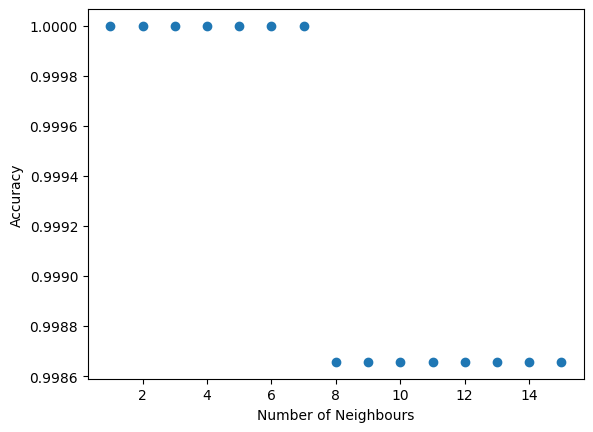

In [21]:
#Printing visual representation of the accuracy values to decide optimal number of neighbours
plt.scatter(num_neigh,kaccuracy)
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.show()
#The optimal number of neighbours decided by the lowest number of neighbours having highest accuracy value

In [22]:
#Training KNN algorithm with dataset
KNN = KNeighborsClassifier(n_neighbors = 1)
KNN = KNN.fit(x_train_scale, y_train)

In [23]:
#Evaluating performance of the model
y_predict1 = KNN.predict(x_test_scale)

In [24]:
#Confusion Matrix to evaluate model outputs
print(confusion_matrix(y_test, y_predict1))

[[36  0  0 ...  0  0  0]
 [ 0 32  0 ...  0  0  0]
 [ 0  0 40 ...  0  0  0]
 ...
 [ 0  0  0 ... 38  0  0]
 [ 0  0  0 ...  0 32  0]
 [ 0  0  0 ...  0  0 38]]


<Axes: xlabel='Predicted', ylabel='Actual'>

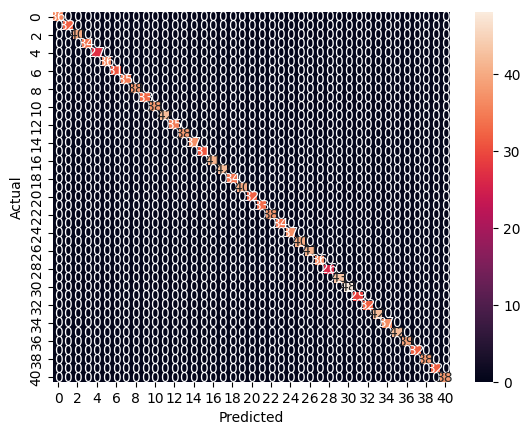

In [25]:
#Confusion Matrix using Heatmap for better understanding
df2 = pd.DataFrame()
df2['Actual'] = y_test
df2['Predicted'] = y_predict1

#Couting frequency in actual and predicted
freq = pd.crosstab(df2.Actual, df2.Predicted)

#Plotting Heatmap
sns.heatmap(freq, annot = True, fmt = 'd')

In [26]:
#KNN Model Evaluation
Kmetrics = class_calculate_metrics(y_test, y_predict1)
print("KNN Model Metrics:")
for km in Kmetrics:
    print(km, ": ", Kmetrics[km], sep = "")

KNN Model Metrics:
Accuracy: 100.0
Precision: 100.0
Recall: 100.0
F1 Score: 100.0


In [27]:
a1 = []
p1 = []
for i in df2['Actual']:
    a1.append(d[i])
for j in df2['Predicted']:
    p1.append(d[j])

In [28]:
k = pd.DataFrame(list(zip(a1, p1)))
kcolumns = ['Actual', 'Predicted']

In [29]:
print(tabulate(k, kcolumns, tablefmt = 'fancy_grid'))

╒══════╤═════════════════════════════════════════╤═════════════════════════════════════════╕
│      │ Actual                                  │ Predicted                               │
╞══════╪═════════════════════════════════════════╪═════════════════════════════════════════╡
│    0 │ Pneumonia                               │ Pneumonia                               │
├──────┼─────────────────────────────────────────┼─────────────────────────────────────────┤
│    1 │ Hyperthyroidism                         │ Hyperthyroidism                         │
├──────┼─────────────────────────────────────────┼─────────────────────────────────────────┤
│    2 │ Chronic cholestasis                     │ Chronic cholestasis                     │
├──────┼─────────────────────────────────────────┼─────────────────────────────────────────┤
│    3 │ Acne                                    │ Acne                                    │
├──────┼─────────────────────────────────────────┼────────────────────

In [30]:
#to get details about the function
help(tabulate)

Help on function tabulate in module tabulate:

tabulate(tabular_data, headers=(), tablefmt='simple', floatfmt='g', intfmt='', numalign='default', stralign='default', missingval='', showindex='default', disable_numparse=False, colalign=None, maxcolwidths=None, rowalign=None, maxheadercolwidths=None)
    Format a fixed width table for pretty printing.
    
    >>> print(tabulate([[1, 2.34], [-56, "8.999"], ["2", "10001"]]))
    ---  ---------
      1      2.34
    -56      8.999
      2  10001
    ---  ---------
    
    The first required argument (`tabular_data`) can be a
    list-of-lists (or another iterable of iterables), a list of named
    tuples, a dictionary of iterables, an iterable of dictionaries,
    an iterable of dataclasses (Python 3.7+), a two-dimensional NumPy array,
    NumPy record array, or a Pandas' dataframe.
    
    
    Table headers
    -------------
    
    To print nice column headers, supply the second argument (`headers`):
    
      - `headers` can be an 

## Decision Tree

- can be used in classification or regression problems
- starts from the root (point where decision tree starts), diverges into multiple directions (branches) and in the end, the final decision is where the tree ends (leaves)

In [31]:
#To decide the maximum depth of the tree
taccuracy = []
depth = []

#Cycling through values 1 to 60 (These will be the max_depth for the decision tree)
for i in range(1,61):
    #Setting max_depth to i
    dt = tree.DecisionTreeClassifier(max_depth = i)
    #Training the model with the data
    dt.fit(x_train_scale,y_train)
    #.score provides the accuracy of the model based on the testing data
    taccuracy.append(dt.score(x_test_scale, y_test))
    #Adding the max_depth to the list
    depth.append(i)
print(taccuracy)

[0.03425117528542646, 0.052384150436534584, 0.07051712558764271, 0.11282740094022835, 0.18334452652787106, 0.2310275352585628, 0.277367360644728, 0.2995298858294157, 0.34519811954331764, 0.3700470114170584, 0.3948959032907992, 0.4150436534586971, 0.46071188717259903, 0.506380120886501, 0.5574210879785091, 0.6084620550705171, 0.6581598388179987, 0.6836803223640027, 0.7092008059100067, 0.7360644728005373, 0.7629281396910679, 0.7857622565480188, 0.8408327736736064, 0.8985896574882472, 0.9274680993955675, 0.9556749496306246, 0.9892545332437878, 0.989926124916051, 0.9912693082605776, 0.9932840832773674, 0.9952988582941572, 0.9973136333109469, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


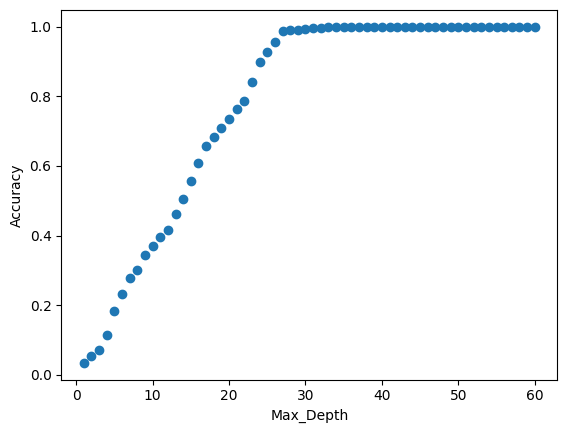

In [32]:
#Printing visual representation of the accuracy values to decide optimal depth
plt.scatter(depth,taccuracy)
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy')
plt.show()
#The optimal depth decided by the value having lowest and having highest accuracy value

In [33]:
#To decide minimum number of samples to prevent overfitting or underfitting
taccuracy2 = []
min_samples = []

#Cycling through values 2 to 15 since value for minimum samples should be more than 1 (These will be the min_samples_split for the decision tree)
for i in range(2,16):
    #Setting min_samples_split to i
    dt = tree.DecisionTreeClassifier(min_samples_split = i)
    #Training the model with the data
    dt.fit(x_train_scale,y_train)
    #.score provides the accuracy of the model based on the testing data
    taccuracy2.append(dt.score(x_test_scale, y_test))
    #Adding the min_samples_split to the list
    min_samples.append(i)
print(taccuracy2)

[1.0, 1.0, 1.0, 1.0, 0.9973136333109469, 0.9973136333109469, 0.9952988582941572, 0.9932840832773674, 0.9932840832773674, 0.9932840832773674, 0.9912693082605776, 0.9912693082605776, 0.9912693082605776, 0.9912693082605776]


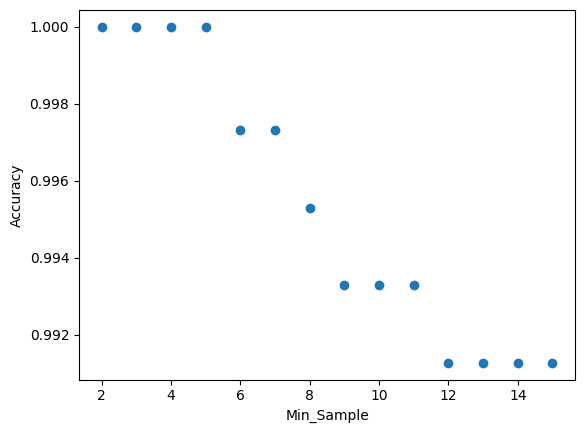

In [34]:
#Printing visual representation of the accuracy values to decide optimal minimum samples
plt.scatter(min_samples,taccuracy2)
plt.xlabel('Min_Sample')
plt.ylabel('Accuracy')
plt.show()
#Values that are too low would be underfitting and too high would be overfitting. Hence, a value in the middle is usually preferable

In [35]:
#Training Decision Tree algorithm with dataset
dt = tree.DecisionTreeClassifier(max_depth = 33, min_samples_split = 5)
dt.fit(x_train_scale, y_train)

DecisionTreeClassifier(max_depth=33, min_samples_split=5)

In [36]:
#Evaluating performance of the model
y_predict2 = dt.predict(x_test_scale)

In [37]:
#Confusion Matrix to evaluate model outputs
print(confusion_matrix(y_test, y_predict2))

[[36  0  0 ...  0  0  0]
 [ 0 32  0 ...  0  0  0]
 [ 0  0 40 ...  0  0  0]
 ...
 [ 0  0  0 ... 38  0  0]
 [ 0  0  0 ...  0 32  0]
 [ 0  0  0 ...  0  0 38]]


<Axes: xlabel='Predicted', ylabel='Actual'>

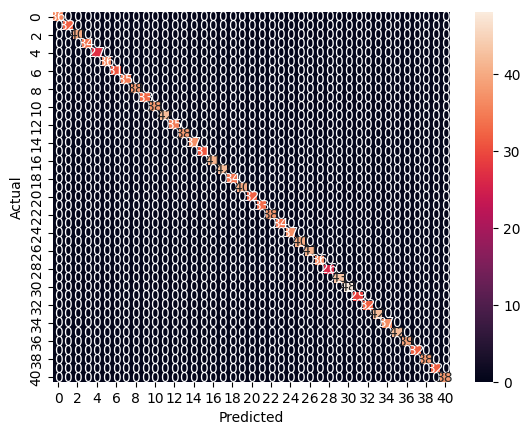

In [38]:
#Confusion Matrix using Heatmap for better understanding
df3 = pd.DataFrame()
df3['Actual'] = y_test
df3['Predicted'] = y_predict2

#Couting frequency in actual and predicted
freq = pd.crosstab(df3.Actual, df3.Predicted)

#Plotting Heatmap
sns.heatmap(freq, annot = True, fmt = 'd')

In [39]:
#Decision Tree Model Evaluation
DTmetrics = class_calculate_metrics(y_test, y_predict2)
print("Decision Tree Model Metrics:")

for dt in DTmetrics:
    print(dt, ": ", DTmetrics[dt], sep = "")

Decision Tree Model Metrics:
Accuracy: 100.0
Precision: 100.0
Recall: 100.0
F1 Score: 100.0


In [40]:
a2 = []
p2 = []
for i in df3['Actual']:
    a2.append(d[i])
for j in df3['Predicted']:
    p2.append(d[j])

In [41]:
t = pd.DataFrame(list(zip(a2, p2)))
tcolumns = ['Actual', 'Predicted']

In [42]:
print(tabulate(t, tcolumns, tablefmt = 'fancy_grid'))

╒══════╤═════════════════════════════════════════╤═════════════════════════════════════════╕
│      │ Actual                                  │ Predicted                               │
╞══════╪═════════════════════════════════════════╪═════════════════════════════════════════╡
│    0 │ Pneumonia                               │ Pneumonia                               │
├──────┼─────────────────────────────────────────┼─────────────────────────────────────────┤
│    1 │ Hyperthyroidism                         │ Hyperthyroidism                         │
├──────┼─────────────────────────────────────────┼─────────────────────────────────────────┤
│    2 │ Chronic cholestasis                     │ Chronic cholestasis                     │
├──────┼─────────────────────────────────────────┼─────────────────────────────────────────┤
│    3 │ Acne                                    │ Acne                                    │
├──────┼─────────────────────────────────────────┼────────────────────

## Neural Networks

- loosely modelled after how neurons in human brain behaves
- they can extact data features automatically without needing the input of the programmer
- fast and efficient way to solve problems when dataset is very large
- neural netword divided into many layers and each layer further divided into nodes; each node has its own task to accomplish which is then passed to the next layer
    - First layer: Input
        - acquire data and feed it to the neural network
        - no processing occurs in first layer
    - Hidden layer: Processing
        - whole processing occurs in hidden layers
        - hidden; not visible to users
        - each node of hidden layer has its own machine learning algorithms which it executes on the data received from the input layer
        - processed output passed on to the subsequent hidden layer
     - Output Layer:
         - last hidden layer passes the final processed data to the output layer
         - gives user final output
         - no processing occurs in the output layer
         - meant for user-interface

In [43]:
model = Sequential()

#Input: Adding first hidden layer with 121 nodes (input_dim is the number of columns in the input layer, activation refers to how the nodes/neurons are activated)
model.add(Dense(121,input_dim=132,activation='relu'))

#Processing: Adding the hidden layer with 242 nodes
model.add(Dense(242,activation='relu'))

#Output: Adding the output layer with 121 nodes (activation used has to be softmax since we are dealing with categorical outputs or targets)
model.add(Dense(121,activation='softmax'))

#Compiling the model (optimizer refers to method to make the adjustment within the model, loss refers to how the difference between the predicted output)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [44]:
#Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 121)               16093     
                                                                 
 dense_1 (Dense)             (None, 242)               29524     
                                                                 
 dense_2 (Dense)             (None, 121)               29403     
                                                                 
Total params: 75020 (293.05 KB)
Trainable params: 75020 (293.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
#Training model
# epochs refer to number of times full dataset used to train the model, shuffle tells the model to randomise the arrangement of the dataset after each epoch(if given as Shuffle = True), validation_data allows to input in the test datasets; shows the model accuracy on the test set.
n = model.fit(x_train,y_train,epochs=100,shuffle=True,validation_data=(x_test,y_test))

Epoch 1/100
109/109 [==============================] - 2s 9ms/step - loss: 2.4754 - accuracy: 0.5528 - val_loss: 0.6001 - val_accuracy: 0.9913
Epoch 2/100
109/109 [==============================] - 0s 4ms/step - loss: 0.1871 - accuracy: 0.9963 - val_loss: 0.0358 - val_accuracy: 1.0000
Epoch 3/100
109/109 [==============================] - 1s 5ms/step - loss: 0.0206 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 4/100
109/109 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 5/100
109/109 [==============================] - 0s 4ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 6/100
109/109 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 7/100
109/109 [==============================] - 0s 4ms/step - loss: 9.6209e-04 - accuracy: 1.0000 - val_loss: 7.3316e-04 - val_accuracy

In [46]:
#Evaluating performance of the model
y_predict3 = model.predict(x_test_scale)

47/47 [==============================] - 0s 3ms/step


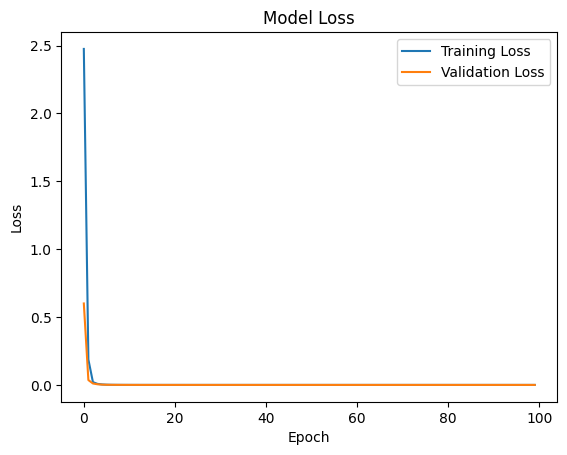

In [47]:
#Model Loss
plt.plot(n.history['loss'])
plt.plot(n.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc = 'upper right')
plt.show()

Training loss:
- assess how a deep learning model fits traning data
- assess error of model in training set
- sum of errors for each example in the training set

Validation loss:
- assess the performance of deep learning model on validation set
    - validation set: portion of dataset set aside to validate performance of model
- sum of the errors for each example in the validation set

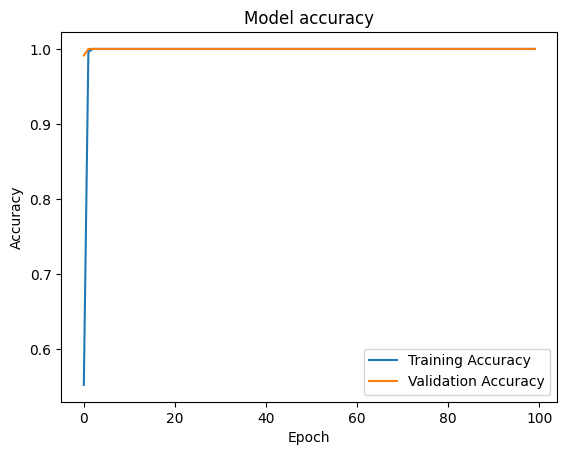

In [48]:
plt.plot(n.history['accuracy'])
plt.plot(n.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

Training accuracy:
- accuracy of a model on the data it was trained on

Validation accuracy:
- accuracy of a model on new data

In [49]:
#To find the index/class with the highest probability along the specified axis (axis = 1 gives maximum value along each row)
predicted_class = np.argmax(y_predict3, axis=1)

In [50]:
#Neural Network Model Evaluation
Nmetrics = class_calculate_metrics(y_test, predicted_class)
print("Neural Network Model Metrics:")

for n in Nmetrics:
    print(n, ": ", Nmetrics[n], sep = "")

Neural Network Model Metrics:
Accuracy: 82.40429818670249
Precision: 99.23977400085306
Recall: 82.40429818670249
F1 Score: 86.56095492683119


In [51]:
nactual = encoder.inverse_transform(y_test)
npredicted = encoder.inverse_transform(predicted_class)

In [52]:
n = []
for i in range(len(npredicted)):
    n.append([nactual[i], npredicted[i]])

ncolumns = ["Actual", "Predicted"]

print(tabulate(n, ncolumns, tablefmt="fancy_grid"))

╒═════════════════════════════════════════╤═════════════════════════════════════════╕
│ Actual                                  │ Predicted                               │
╞═════════════════════════════════════════╪═════════════════════════════════════════╡
│ AIDS                                    │ AIDS                                    │
├─────────────────────────────────────────┼─────────────────────────────────────────┤
│ Migraine                                │ Migraine                                │
├─────────────────────────────────────────┼─────────────────────────────────────────┤
│ Alcoholic hepatitis                     │ Alcoholic hepatitis                     │
├─────────────────────────────────────────┼─────────────────────────────────────────┤
│ Chicken pox                             │ Chicken pox                             │
├─────────────────────────────────────────┼─────────────────────────────────────────┤
│ Chronic cholestasis                     │ Chronic ch

## Random Forest Regression

- Fundamental idea: combine many decision trees into single model

In [53]:
#Training
# random_state controls randomness of the sample (usually 0 or 42)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train_scale, y_train,y_train)

RandomForestRegressor(random_state=42)

In [54]:
#Evaluating performance of the model
y_predict4 = rf_model.predict(x_test_scale)

In [55]:
#Random Forest Regression Model Evaluation
RFmetrics = reg_calculate_metrics(y_test, y_predict4)
print("Random Forest Regression Model Metrics:")

for rf in RFmetrics:
    print(rf, ": ", RFmetrics[rf], sep = "")

Random Forest Regression Model Metrics:
Mean Absolute Error: 2.72934855607791
Mean Squared Error: 2.5203895231699125
Root Mean Squared Error: 158.75734701644245
R-squared: 99.98158136677314


In [56]:
rpredicted = encoder.inverse_transform(y_predict4.astype(int))
ractual = encoder.inverse_transform(y_test)

In [57]:
rp = []
for i in range(len(rpredicted)):
    rp.append([ractual[i], rpredicted[i]])

rpcolumns = ["Actual", "Predicted"]

print(tabulate(rp, rpcolumns, tablefmt="fancy_grid"))

╒═════════════════════════════════════════╤═══════════════════════════════╕
│ Actual                                  │ Predicted                     │
╞═════════════════════════════════════════╪═══════════════════════════════╡
│ AIDS                                    │ AIDS                          │
├─────────────────────────────────────────┼───────────────────────────────┤
│ Migraine                                │ Migraine                      │
├─────────────────────────────────────────┼───────────────────────────────┤
│ Alcoholic hepatitis                     │ Alcoholic hepatitis           │
├─────────────────────────────────────────┼───────────────────────────────┤
│ Chicken pox                             │ Chicken pox                   │
├─────────────────────────────────────────┼───────────────────────────────┤
│ Chronic cholestasis                     │ Chronic cholestasis           │
├─────────────────────────────────────────┼───────────────────────────────┤
│ Hyperthyro

## Linear Regression

- predicts the value of unknown data by using another related and known data value

In [58]:
#Training
reg = LinearRegression()
reg.fit(x_train_scale,y_train)

LinearRegression()

In [59]:
#Evaluating performance of the model
y_predict5 = reg.predict(x_test_scale)

In [60]:
#Linear Regression Model Evaluation
LRmetrics = reg_calculate_metrics(y_test, y_predict5)
print("Linear Regression Model Metrics:")

for lr in LRmetrics:
    print(lr, ": ", LRmetrics[lr], sep = "")

Linear Regression Model Metrics:
Mean Absolute Error: 1.8399430177347253e-12
Mean Squared Error: 5.75543168268823e-26
Root Mean Squared Error: 2.399048078444496e-11
R-squared: 100.0


In [61]:
lpredicted = encoder.inverse_transform(y_predict5.astype(int))
lactual = encoder.inverse_transform(y_test)

In [62]:
l = []
for i in range(len(lpredicted)):
    l.append([lactual[i], lpredicted[i]])

lcolumns = ["Actual", "Predicted"]

print(tabulate(l, lcolumns, tablefmt="fancy_grid"))

╒═════════════════════════════════════════╤═════════════════════════════════════════╕
│ Actual                                  │ Predicted                               │
╞═════════════════════════════════════════╪═════════════════════════════════════════╡
│ AIDS                                    │ AIDS                                    │
├─────────────────────────────────────────┼─────────────────────────────────────────┤
│ Migraine                                │ Migraine                                │
├─────────────────────────────────────────┼─────────────────────────────────────────┤
│ Alcoholic hepatitis                     │ Acne                                    │
├─────────────────────────────────────────┼─────────────────────────────────────────┤
│ Chicken pox                             │ Cervical spondylosis                    │
├─────────────────────────────────────────┼─────────────────────────────────────────┤
│ Chronic cholestasis                     │ Chicken po

## Logistic Regression

- used for classification and predictive analytics
- estimates the probability of an event occurring based on a given dataset of independent variables.
- used when the dependent variable is categorical.

In [63]:
#Training
lr = LogisticRegression()
lr.fit(x_train_scale,y_train)

LogisticRegression()

In [64]:
#Evaluating performance of the model
y_predict6 = lr.predict(x_test_scale)

In [65]:
#Logistic Regression Model Evaluation
LR2metrics = reg_calculate_metrics(y_test, y_predict6)
print("Logistic Regression Model Metrics:")

for lr2 in LR2metrics:
    print(lr2, ": ", LR2metrics[lr2], sep = "")

Logistic Regression Model Metrics:
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R-squared: 100.0


In [66]:
lrpredicted = encoder.inverse_transform(y_predict6.astype(int))
lractual = encoder.inverse_transform(y_test)

In [67]:
lr = []
for i in range(len(lrpredicted)):
    lr.append([lractual[i], lrpredicted[i]])

lrcolumns = ["Actual", "Predicted"]

print(tabulate(lr, lrcolumns, tablefmt="fancy_grid"))

╒═════════════════════════════════════════╤═════════════════════════════════════════╕
│ Actual                                  │ Predicted                               │
╞═════════════════════════════════════════╪═════════════════════════════════════════╡
│ AIDS                                    │ AIDS                                    │
├─────────────────────────────────────────┼─────────────────────────────────────────┤
│ Migraine                                │ Migraine                                │
├─────────────────────────────────────────┼─────────────────────────────────────────┤
│ Alcoholic hepatitis                     │ Alcoholic hepatitis                     │
├─────────────────────────────────────────┼─────────────────────────────────────────┤
│ Chicken pox                             │ Chicken pox                             │
├─────────────────────────────────────────┼─────────────────────────────────────────┤
│ Chronic cholestasis                     │ Chronic ch

# GUI

In [68]:
v = ['Itching','Skin Rash','Nodal Skin Eruptions','Continuous Sneezing','Shivering','Chills','Joint Pain','Stomach Pain','Acidity','Ulcers On Tongue','Muscle Wasting','Vomiting','Burning Micturition','Spotting Urination','Fatigue','Weight Gain','Anxiety','Cold Hands And Feets','Mood Swings','Weight Loss','Restlessness','Lethargy','Patches In Throat','Irregular Sugar Level','Cough','High Fever','Sunken Eyes','Breathlessness','Sweating','Dehydration','Indigestion','Headache','Yellowish Skin','Dark Urine','Nausea','Loss Of Appetite','Pain Behind The Eye','Back Pain','Constipation','Abdominal Pain','Diarrhoea','Mild Fever','Yellow Urine','Yellowing Of Eyes','Acute Liver Failure','Swelling Of Stomach','Swelled Lymph Nodes','Malaise','Blurred And Distorted Vision','Phlegm','Throat Irritation','Redness Of Eyes','Sinus Pressure','Runny Nose','Congestion','Chest Pain','Weakness In Limbs','Fast Heart Rate','Pain During Bowel Movements','Pain In Anal Region','Bloody Stool','Irritation In Anus','Neck Pain','Dizziness','Cramps','Bruising','Obesity','Swollen Legs','Swollen Blood Vessels','Puffy Face And Eyes','Enlarged Thyroid','Brittle Nails','Swollen Extremeties','Excessive Hunger','Extra Marital Contacts','Drying And Tingling Lips','Slurred Speech','Knee Pain','Hip Joint Pain','Muscle Weakness','Stiff Neck','Swelling Joints','Movement Stiffness','Spinning Movements','Loss Of Balance','Unsteadiness','Weakness Of One Body Side','Loss Of Smell','Bladder Discomfort','Foul Smell Of Urine','Continuous Feel Of Urine','Passage Of Gases','Internal Itching','Toxic Look (typhos)','Depression','Irritability','Muscle Pain','Altered Sensorium','Red Spots Over Body','Belly Pain','Abnormal Menstruation','Dischromic Patches','Watering From Eyes','Increased Appetite','Polyuria','Family History','Mucoid Sputum','Rusty Sputum','Lack Of Concentration','Visual Disturbances','Receiving Blood Transfusion','Receiving Unsterile Injections','Coma','Stomach Bleeding','Distention Of Abdomen','History Of Alcohol Consumption','Blood In Sputum','Prominent Veins On Calf','Palpitations','Painful Walking','Pus Filled Pimples','Blackheads','Scurring','Skin Peeling','Silver Like Dusting','Small Dents In Nails','Inflammatory Nails','Blister','Red Sore Around Nose','Yellow Crust Ooze',]

In [69]:
def predict_disease(input_array):
    input_array = np.array(input_array).reshape(1, -1)
    prediction = lr.predict(input_array)
    predicted = encoder.inverse_transform(prediction)
    return predicted


input_choices = v.copy()

def convert_array(selected_choices):
    input_array = [1 if choice in selected_choices else 0 for choice in input_choices]
    return input_array

app = gr.Interface(
    fn=predict_disease,
    inputs=[gr.components.CheckboxGroup(input_choices, type="index", label = "Select the Symptoms")],
    outputs="text"
)

app.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ea9ada3912dcdbf5d7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
